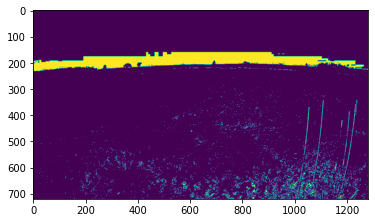

In [92]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
# import the necessary packages
from collections import deque
from imutils.video import VideoStream
# import numpy as np
import argparse
# import cv2
import imutils
import time
from IPython import display
from IPython.display import Video

#add back in when taking out of notebook and to use command line args
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-v", "--video",
# 	help="path to the (optional) video file")
# ap.add_argument("-b", "--buffer", type=int, default=32,
# 	help="max buffer size")
# args = vars(ap.parse_args())

image_path = '/home/arnold/raindrop-detection-cnn/mesonet/20160420T221001_DELE.jpg'
rawImage = cv2.imread(image_path)
#large white color
hsv = cv2.cvtColor(rawImage, cv2.COLOR_BGR2HSV)
lower_white = np.array([0,0,180])
higher_white = np.array([255,255,255])
white_range = cv2.inRange(rawImage, lower_white, higher_white)

# cv2.imshow("White", white_range);cv2.waitKey(0);
plt.imshow(white_range)
plt.show()

Loading BokehJS ...

In [4]:
#for video
# define the lower and upper boundaries of the "green"
# ball in the HSV color space
greenLower = (29, 86, 6)
greenUpper = (64, 255, 255)
# initialize the list of tracked points, the frame counter,
# and the coordinate deltas
pts = deque(maxlen=args["buffer"])
counter = 0
(dX, dY) = (0, 0)
direction = ""
# if a video path was not supplied, grab the reference
# to the webcam
if not args.get("video", False):
	vs = VideoStream(src=0).start()
# otherwise, grab a reference to the video file
else:
	vs = cv2.VideoCapture(args["video"])
# allow the camera or video file to warm up
time.sleep(2.0)

NameError: name 'args' is not defined

In [107]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
import cv2
import time
output_notebook()

cap = cv2.VideoCapture("/home/arnold/raindrop-detection-cnn/mygeneratedvideo.mp4")
ret, frame = cap.read()
# frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)

# while True:
#     ret, frame = cap.read()
# #     frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
#     frame=cv2.flip(frame, -1)
#     myImage.data_source.data['image']=[frame]
#     push_notebook()
#     time.sleep(0.3)

Loading BokehJS ...

In [152]:
#to track frame by frame and process individually 
# keep looping
whiteUpper = (0,0,180)
whiteLower = (255,255,255)
lower_white = np.array([0,0,180])
higher_white = np.array([255,255,255])
pts = deque([], maxlen=32)
counter = 0
(dX, dY) = (0, 0)
direction = ""
#to store images to then save to video
img_array = []

vs = cv2.VideoCapture("/home/arnold/raindrop-detection-cnn/imgvideo.mp4")
while True:
    # grab the current frame
    ret, frame = vs.read()
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     plt.imshow(frame)
#   frame = vs.read()
    # handle the frame from VideoCapture or VideoStream
    #frame = frame[1] if args.get("video", False) else frame
#     plt.imshow(frame)
    # if we are viewing a video and we did not grab a frame,
    # then we have reached the end of the video
    
    if frame is None:
        break
#     print(frame)
    # resize the frame, blur it, and convert it to the HSV
    # color space
#     frame = imutils.resize(frame, width=600)
    blurred = cv2.GaussianBlur(frame, (11, 11), 0)
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    # construct a mask for the color "green", then perform
    # a series of dilations and erosions to remove any small
    # blobs left in the mask
    mask = cv2.inRange(hsv, lower_white, higher_white)
    mask = cv2.erode(mask, None, iterations=2)
    mask = cv2.dilate(mask, None, iterations=2)
    # find contours in the mask and initialize the current
    # (x, y) center of the ball
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    #print(len(cnts))
    center = None
        # only proceed if at least one contour was found
    #print(frame)
    if len(cnts) > 0:
        # find the largest contour in the mask, then use
        # it to compute the minimum enclosing circle and
        # centroid
        c = max(cnts, key=cv2.contourArea)
        ((x, y), radius) = cv2.minEnclosingCircle(c)
        M = cv2.moments(c)
        center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
        # only proceed if the radius meets a minimum size
        #print(radius)
        if radius > 10:
            # draw the circle and centroid on the frame,
            # then update the list of tracked points
            cv2.circle(frame, (int(x), int(y)), int(radius),
                (0, 255, 255), 2)
            cv2.circle(frame, center, 5, (0, 0, 255), -1)
            pts.appendleft(center)
            #print(pts)
            	# loop over the set of tracked points
    for i in np.arange(1, len(pts)):
        # if either of the tracked points are None, ignore
        # them
        if pts[i - 1] is None or pts[i] is None:
            continue
        # check to see if enough points have been accumulated in
        # the buffer
        if counter >= 10 and i == 1 and pts[-5] is not None:
            # compute the difference between the x and y
            # coordinates and re-initialize the direction
            # text variables
            dX = pts[-5][0] - pts[i][0]
            dY = pts[-5][1] - pts[i][1]
            (dirX, dirY) = ("", "")
            # ensure there is significant movement in the
            # x-direction
            if np.abs(dX) > 20:
                dirX = "East" if np.sign(dX) == 1 else "West"
            # ensure there is significant movement in the
            # y-direction
            if np.abs(dY) > 20:
                dirY = "North" if np.sign(dY) == 1 else "South"
            # handle when both directions are non-empty
            if dirX != "" and dirY != "":
                direction = "{}-{}".format(dirY, dirX)
            # otherwise, only one direction is non-empty
            else:
                    direction = dirX if dirX != "" else dirY
            # otherwise, compute the thickness of the line and
#         print("drwing")# draw the connecting lines
        thickness = int(np.sqrt(32 / float(i + 1)) * 2.5)
        cv2.line(frame, pts[i - 1], pts[i], (0, 0, 255), thickness)
    # show the movement deltas and the direction of movement on
#     print(frame)# the frame
    cv2.putText(frame, direction, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
        0.65, (0, 0, 255), 3)
    cv2.putText(frame, "dx: {}, dy: {}".format(dX, dY),
        (10, frame.shape[0] - 10), cv2.FONT_HERSHEY_SIMPLEX,
        0.35, (0, 0, 255), 1)
    # show the frame to our screen and increment the frame counter
#     cv2.imshow("Frame", frame)
    #print(frame)
    height, width, layers = frame.shape
    #print(width,height)
    img_array.append(frame)
    #put in if  you want to display now frame by frame
#     plt.imshow(frame)
#     display.clear_output(wait=True)
#     display.display(plt.gcf())
    
#     key = cv2.waitKey(1) & 0xFF
#     key += 1
    counter += 1
# vs.release()

#uncomment to ssave video
video = cv2.VideoWriter('video_wdir.mp4',cv2.VideoWriter_fourcc(*'FMP4'), 12, (1280, 720))

#add each image to video as frame
for i in range(len(img_array)):
    video.write(img_array[i])
video.release()

None
74.5453872680664
deque([(13, 239)], maxlen=32)


None


AttributeError: 'NoneType' object has no attribute 'shape'

In [57]:
        # otherwise, compute the thickness of the line and
        # draw the connecting lines
        thickness = int(np.sqrt(args["buffer"] / float(i + 1)) * 2.5)
        cv2.line(frame, pts[i - 1], pts[i], (0, 0, 255), thickness)
        # show the movement deltas and the direction of movement on
        # the frame

    cv2.putText(frame, direction, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,0.65, (0, 0, 255), 3)
    cv2.putText(frame, "dx: {}, dy: {}".format(dX, dY),
		(10, frame.shape[0] - 10), cv2.FONT_HERSHEY_SIMPLEX,
		0.35, (0, 0, 255), 1)
	# show the frame to our screen and increment the frame counter
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF
	counter += 1
	# if the 'q' key is pressed, stop the loop
	if key == ord("q"):
		break
# if we are not using a video file, stop the camera video stream
if not args.get("video", False):
	vs.stop()
# otherwise, release the camera
else:
	vs.release()
# close all windows
cv2.destroyAllWindows()

IndentationError: unexpected indent (<ipython-input-57-6fb314fed071>, line 8)